<a href="https://colab.research.google.com/github/Tharunkumar1724/ML-Internship/blob/main/Credit_card_fraud1_using_Suport_vector_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
np.__version__


'1.26.4'

** Isolation Forest is an unsupervised anomaly detection algorithm that is particularly effective for identifying outliers in high-dimensional datasets. It works on the principle that anomalies are easier to isolate compared to normal data points.**

In [ ]:
path="/content/creditcard.csv"

In [ ]:
mat=pd.read_csv(path)
df=pd.DataFrame(mat)

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57531 entries, 0 to 57530
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    57531 non-null  int64  
 1   V1      57531 non-null  float64
 2   V2      57531 non-null  float64
 3   V3      57531 non-null  float64
 4   V4      57531 non-null  float64
 5   V5      57530 non-null  float64
 6   V6      57530 non-null  float64
 7   V7      57530 non-null  float64
 8   V8      57530 non-null  float64
 9   V9      57530 non-null  float64
 10  V10     57530 non-null  float64
 11  V11     57530 non-null  float64
 12  V12     57530 non-null  float64
 13  V13     57530 non-null  float64
 14  V14     57530 non-null  float64
 15  V15     57530 non-null  float64
 16  V16     57530 non-null  float64
 17  V17     57530 non-null  float64
 18  V18     57530 non-null  float64
 19  V19     57530 non-null  float64
 20  V20     57530 non-null  float64
 21  V21     57530 non-null  float64
 22

**Exploratory** **data** **analysis**

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,1
V6,1
V7,1
V8,1
V9,1


In [ ]:
df['Class'].unique()

array([ 0.,  1., nan])

In [ ]:
df['Class'].value_counts()

,count
Class,
0.0,57371
1.0,159


**Here 0 states OG transaction and 1 states** **fraud** **transaction**

<ipython-input-10-615b9b72070c>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  cnt=pd.value_counts(df['Class'],sort=True)


Text(0, 0.5, 'Frequency')

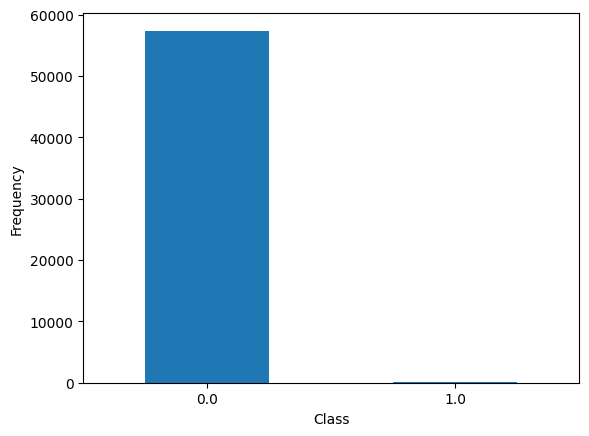

In [ ]:
cnt=pd.value_counts(df['Class'],sort=True)
import matplotlib.pyplot as plt
cnt.plot(kind='bar',rot=0)
plt.xlabel("Class")
plt.ylabel("Frequency")

**The 1 class is defined as fraud class in the credit card detection**

In [ ]:
OG=df[df['Class']==0]
fraud=df[df['Class']==1]
fraud.shape

(159, 31)

In [ ]:
fraud.shape

(159, 31)

In [ ]:
OG['Amount'].describe()

,Amount
count,57371.000000
mean,94.964936
std,258.837451
min,0.000000
25%,7.730000
50%,26.000000
75%,87.265000
max,12910.930000


In [ ]:
fraud['Amount'].describe()

,Amount
count,159.000000
mean,94.008491
std,226.356407
min,0.000000
25%,1.000000
50%,4.560000
75%,99.990000
max,1809.680000


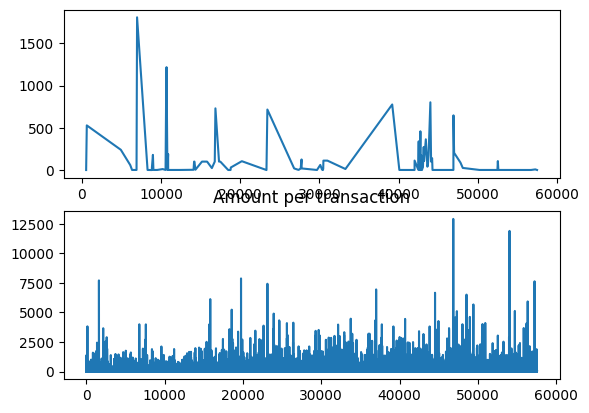

In [ ]:

f,(ax1,ax2)=plt.subplots(2,1)
plt.title("Amount per transaction")
ax1.plot(fraud['Amount'])
ax2.plot(OG['Amount'])
plt.show()


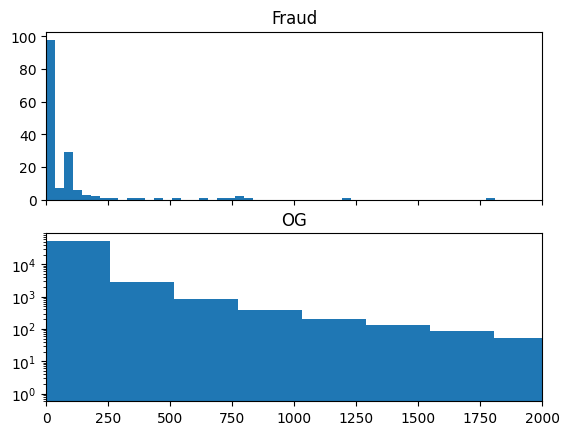

In [ ]:

f,(ax1,ax2)=plt.subplots(2,1,sharex=True)
plt.title("Amount per transaction")
bins=50
ax1.hist(fraud.Amount,bins=bins)
ax1.set_title('Fraud')
ax2.hist(OG.Amount,bins=bins)
ax2.set_title('OG')
plt.xlim((0,2000))
plt.yscale('log')

plt.show()


In [ ]:
df1=df.sample(frac=0.1,random_state=1)

In [ ]:
df1.shape

(5753, 31)

In [ ]:
fraud1=df1[df1['Class']==1]
OG1=df1[df1['Class']==0]
out_lier=len(fraud1)/float(len(OG1))
out_lier

0.0020902281832433376

In [ ]:
format(len(OG1))


'5741'

In [ ]:
format(len(fraud1))

'12'

<Axes: >

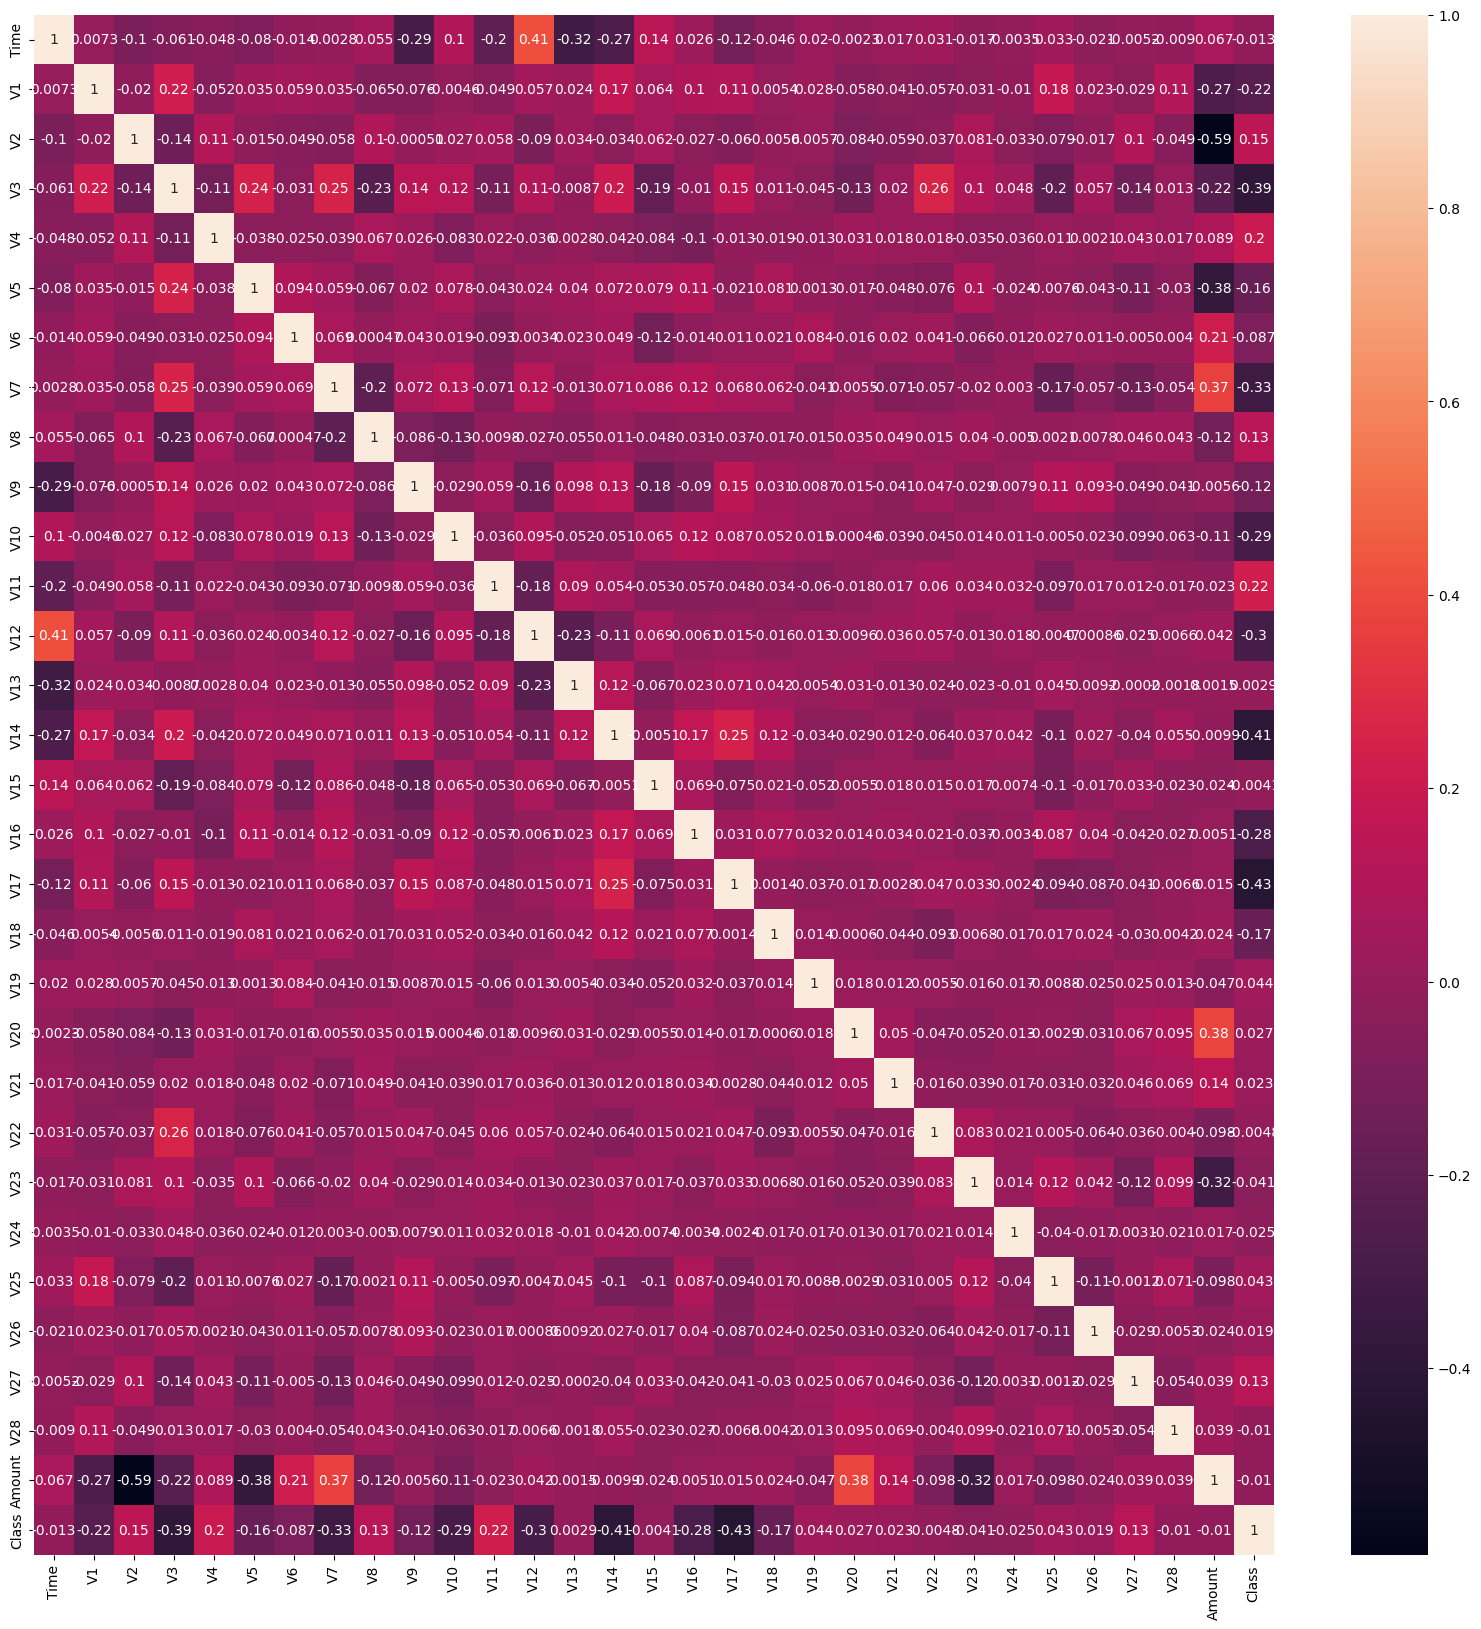

In [ ]:
import seaborn as sns
cori=df1.corr()
corri_feature=cori.index
corri_feature
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True)

In [ ]:
 x=df1.drop('Class',axis=1)
 y=df1['Class']

In [ ]:

y.shape

(5753,)

**Using Isolation Forest**

```



In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(x)

IsolationForest(contamination=0.1, random_state=42)

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(x)

IsolationForest(contamination=0.1, random_state=42)

In [ ]:
y_pred = iso_forest.predict(x)

In [ ]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

In [ ]:
print(classification_report(y, y_pred))
print("Accuracy:", accuracy_score(y, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95      5741
         1.0       0.02      0.92      0.04        12

    accuracy                           0.90      5753
   macro avg       0.51      0.91      0.49      5753
weighted avg       1.00      0.90      0.95      5753

Accuracy: 0.9016165478880585


**Using Support Vector Machine**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
x=df1.drop('Class',axis=1)
y=df1['Class']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.fit_transform(X_test)
svm_classifier=SVC(kernel='linear',C=1.0,gamma='scale')
svm_classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
y_pred=svm_classifier.predict(X_test)
print("Classification Report:\n", classification_report(Y_test, y_pred))
print("Accuracy:", accuracy_score(Y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1149
         1.0       1.00      0.50      0.67         2

    accuracy                           1.00      1151
   macro avg       1.00      0.75      0.83      1151
weighted avg       1.00      1.00      1.00      1151

Accuracy: 0.9991311902693311



**he Support Vector Machine was Over fitting in Order to acheive my Prediction model acurately i used resampling**



In [ ]:
from sklearn.utils import resample
fraud1=df1[df1['Class']==1]
OG1=df1[df1['Class']==0]


In [ ]:
print(OG1.shape)
print(fraud1.shape)


(5741, 31)
(12, 31)


In [ ]:
df_minority_upsampled=resample(fraud1,replace=True,n_samples=7000,random_state=123)
df_minority_upsampled.shape
df_upsampled=pd.concat([OG1,df_minority_upsampled])
df_upsampled.shape

(12741, 31)

In [ ]:
x=df_upsampled.drop('Class',axis=1)
y=df_upsampled['Class']
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scale=StandardScaler()

In [ ]:
X_train=scale.fit_transform(X_train)
X_test=scale.fit_transform(X_test)
svm_classifier=SVC(kernel='linear',C=1.0,gamma='scale')
svm_classifier.fit(X_train,Y_train)


SVC(kernel='linear')

In [ ]:
y_pred=svm_classifier.predict(X_test)
print("Classification Report:\n", classification_report(Y_test, y_pred))
print("Accuracy:", accuracy_score(Y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1183
         1.0       1.00      1.00      1.00      1366

    accuracy                           1.00      2549
   macro avg       1.00      1.00      1.00      2549
weighted avg       1.00      1.00      1.00      2549

Accuracy: 0.9984307571596704


In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

# Local Outlier Factor (LOF) Analysis
lof = LocalOutlierFactor(n_neighbors=20, contamination=out_lier)
y_pred_lof = lof.fit_predict(X_train)

# Convert LOF predictions to binary (1 for outliers, 0 for inliers)
y_pred_lof_binary = [1 if p == -1 else 0 for p in y_pred_lof]

# Classification Report for LOF (using training labels)
print("Local Outlier Factor (LOF) Classification Report (Training Data):")
print(classification_report(Y_train, y_pred_lof_binary))

# Accuracy
print("Accuracy:", accuracy_score(Y_train, y_pred_lof_binary))

Local Outlier Factor (LOF) Classification Report (Training Data):
              precision    recall  f1-score   support

         0.0       0.45      1.00      0.62      4592
         1.0       0.00      0.00      0.00      5600

    accuracy                           0.45     10192
   macro avg       0.22      0.50      0.31     10192
weighted avg       0.20      0.45      0.28     10192

Accuracy: 0.44839089481946626


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(
